In [1]:
import pandas as pd
full_df = pd.read_csv(open('/Volumes/MyPassport/text privacy/10_06.csv', 'r'), sep='\t')

In [2]:
full_df = full_df.dropna()

In [3]:
full_df = full_df.reset_index()

In [4]:
full_df = full_df[full_df.columns[3:]]

In [5]:
full_df.head()

,apk_name,apk_name_file,text,category,label_category,USER_IDENTIFIERS,UNIQUE_IDENTIFIER,SAFE,OTHERS,LOCATION_INFORMATION,ERROR
0,jp.ne.ibis.ibispaintx.app,ART_AND_DESIGN_jp.ne.ibis.ibispaintx.app.txt,google analytics this document is translated f...,ART_AND_DESIGN,"['(NO_CATEGORY)', '(OTHERS)']",0,0,0,1,0,0
1,com.canva.editor,ART_AND_DESIGN_com.canva.editor.txt,this policy sets out how canva collects and us...,ART_AND_DESIGN,['(NO_CATEGORY)'],0,0,0,1,0,0
2,com.vblast.flipaclip,ART_AND_DESIGN_com.vblast.flipaclip.txt,the types of information we may collect or tha...,ART_AND_DESIGN,"['(NO_CATEGORY)', '(OTHERS)']",0,0,0,1,0,0
3,com.wallsstudio.bnk48,ART_AND_DESIGN_com.wallsstudio.bnk48.txt,walls studio wallpaper does collect anonymous ...,ART_AND_DESIGN,"['(NO_CATEGORY)', '(OTHERS)']",0,0,0,1,0,0
4,com.medibang.android.paint.tablet,ART_AND_DESIGN_com.medibang.android.paint.tabl...,services sign up ・他のサービス（google、facebook、twitt...,ART_AND_DESIGN,['(SAFE)'],0,0,1,0,0,0


In [6]:
target_count = full_df.USER_IDENTIFIERS.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

Class 0: 8723
Class 1: 1190
Proportion: 7.33 : 1


In [7]:
# Class count
count_class_0, count_class_1 = full_df.USER_IDENTIFIERS.value_counts()

# Divide by class
full_df_0 = full_df[full_df['USER_IDENTIFIERS'] == 0]
full_df_1 = full_df[full_df['USER_IDENTIFIERS'] == 1]

Random under-sampling:
1    1190
0    1190
Name: USER_IDENTIFIERS, dtype: int64


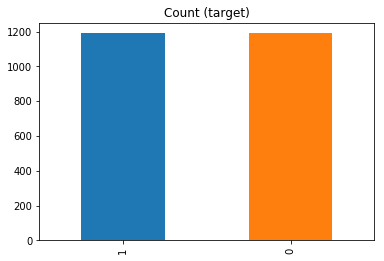

In [8]:
df_class_0_under = full_df_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, full_df_1], axis=0)

print('Random under-sampling:')
print(df_test_under.USER_IDENTIFIERS.value_counts())

df_test_under.USER_IDENTIFIERS.value_counts().plot(kind='bar', title='Count (target)');

In [9]:
pd.crosstab([df_test_under.category], [df_test_under.USER_IDENTIFIERS], margins=True)

USER_IDENTIFIERS,0,1,All
category,,,
ART_AND_DESIGN,23,34,57
AUTO_AND_VEHICLES,27,13,40
BEAUTY,28,74,102
BOOKS_AND_REFERENCE,9,6,15
BUSINESS,10,8,18
COMICS,19,58,77
COMMUNICATION,28,44,72
DATING,13,31,44
EDUCATION,31,26,57


In [10]:
X,y = df_test_under.text,df_test_under[full_df.columns[5:6]]

In [11]:
import nltk
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk import word_tokenize
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(min_df=0.020,max_df=0.5,  max_features=30000, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,
            stop_words = 'english')

x =  vectorizer.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(x.toarray(), y, test_size = 0.30, random_state = 45)


In [13]:
categories = list(y.columns.values)

In [14]:
categories

['USER_IDENTIFIERS']

In [ ]:
sns.set()
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                             ('clf', OneVsRestClassifier(LogisticRegression(), n_jobs=-1)),
                           ])

labels = ['1', '0']
LogReg_pipeline.fit(text_train, sent_train.USER_IDENTIFIERS)

# calculating test accuracy
prediction = LogReg_pipeline.predict(text_test)
cm = confusion_matrix(sent_test.USER_IDENTIFIERS, prediction)
print(cm)
print("\n")
print('Test accuracy is {}'.format(accuracy_score(sent_test.USER_IDENTIFIERS, prediction)))
print(classification_report(sent_test.USER_IDENTIFIERS, prediction, labels=list(set(sent_test.USER_IDENTIFIERS)), target_names=['NEGATIVE', 'POSITIVE']))
print("\n")

In [ ]:
print(most_informative_feature_for_binary_classification(vectorizer, LogReg_pipeline.named_steps['clf']))